# Figure 7 - Cell-type-specific behavior maps

Create (DC x amplitude) behavior maps of RS and LTS neurons at various pulse repetition frequencies, along with characteristic Q-V traces, from SONIC model predictions.

### Imports

In [12]:
import os
import logging
import numpy as np
import matplotlib.pyplot as plt
from PySONIC.utils import logger
from PySONIC.neurons import getPointNeuron
from PySONIC.plt import cm2inch, FiringRateMap
from utils import subdirectory, codes, saveFigsAsPDF

logger.setLevel(logging.INFO)

### Functions

In [13]:
def plotMapAndTraces(subdir, pneuron, a, Fdrive, tstim, amps, PRF, DCs, cov,
                     FRbounds=None, thresholds=True, insets=None, tbounds=None,
                     Vbounds=None, map_figsize=None, trace_figsize=None, fs=8, lw=1):

    mapcodes = codes(a, pneuron, Fdrive, PRF, tstim)
    subsubdir = os.path.join(subdir, ' '.join(mapcodes))
    figs = {}

    # FR map
    frmap = FiringRateMap(subsubdir, pneuron, a, 1., Fdrive, tstim, PRF, amps, DCs)
    frmap.run(mpi=True)
    mapfig = frmap.render(
        zbounds=FRbounds, thresholds=thresholds, figsize=map_figsize, fs=fs, insets=insets)
    figs['map_' + '_'.join(mapcodes)] = mapfig

    # Related inset traces
    for inset in insets:
        DC, Adrive = inset[:2]
        tracefig = frmap.plotTimeseries(DC, Adrive, fs=fs, patches='none')
        tracefig.set_size_inches(trace_figsize)
        if tbounds is not None:
            tracefig.axes[0].set_xlim(tbounds)
        if Vbounds is not None:
            tracefig.axes[0].set_ylim(Vbounds)
        figcode = 'VQ trace {} {:.1f}kPa {:.0f}%DC'.format(pneuron.name, Adrive, DC)
        figs[figcode] = tracefig

    return figs

### Data sub-directory

In [14]:
subdir = subdirectory('maps')

### Plot parameters

In [15]:
figindex = 7
pltargs = {
    'map_figsize': cm2inch(16, 11.6),
    'trace_figsize': cm2inch(14, 6),
    'fs': 14,
    'lw': 2,
    'FRbounds': (1e0, 1e3),  # Hz
    'tbounds': (0, 240.),  # s
    'Vbounds': (-150, 50),  # mV
    'thresholds': False
}
figs = {}

### Simulation parameters

In [16]:
a = 32e-9       # m
Fdrive = 500e3  # Hz
tstim = 1.0     # s
cov = 1.0
amps = np.logspace(np.log10(10), np.log10(600), num=30) * 1e3  # Pa
DCs = np.arange(1, 101) * 1e-2
sim_args = lambda pneuron, PRF: [subdir, pneuron, a, Fdrive, tstim, amps, PRF, DCs, cov]

## 10 Hz PRF

In [17]:
subindex = 'a'
PRF = 1e1  # Hz

### RS neuron

 28/04/2020 15:46:04: Firing rate range: 2 - 799 Hz
 28/04/2020 15:46:04: File "ASTIM_RS_PW_32nm_f_500kHz_A_126.96kPa_tstim_1s_PRF_10.00Hz_DC_28.0%_sonic.pkl" already present in directory "C:\Users\lemaire\Documents\SONIC paper data\maps\RS 32nm 500kHz PRF10Hz 1s" -> preserving
 28/04/2020 15:46:04: Loading data from "ASTIM_RS_PW_32nm_f_500kHz_A_126.96kPa_tstim_1s_PRF_10.00Hz_DC_28.0%_sonic.pkl"


ValueError: Unknown model type:ASTIM

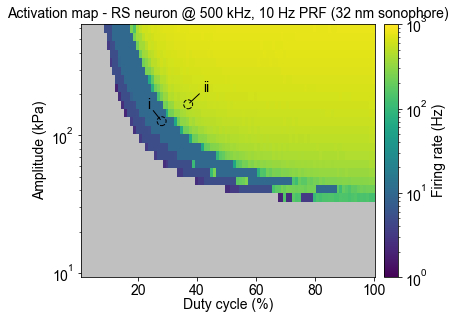

In [18]:
pneuron = getPointNeuron('RS')
insets = [(28., 126.96, 'i', 'ul'), (37., 168.39, 'ii', 'ur')]
out = plotMapAndTraces(*sim_args(pneuron, PRF), insets=insets, **pltargs)
figs.update({f'{subindex}_{k}': v for k, v in out.items()})

### LTS neuron

In [ ]:
pneuron = getPointNeuron('LTS')
insets = [(8, 47.26, 'iii', 'lr'), (30, 146.22, 'iv', 'ur')]
out = plotMapAndTraces(*sim_args(pneuron, PRF), insets=insets, **pltargs)
figs.update({f'{subindex}_{k}': v for k, v in out.items()})

## 100 Hz PRF

In [ ]:
subindex = 'b'
PRF = 1e2  # Hz

### RS neuron

In [ ]:
pneuron = getPointNeuron('RS')
insets = [(51, 452.40, 'i', 'ul'), (56, 452.40, 'ii', 'ur')]
out = plotMapAndTraces(*sim_args(pneuron, PRF), insets=insets, **pltargs)
figs.update({f'{subindex}_{k}': v for k, v in out.items()})

### LTS neuron

In [ ]:
pneuron = getPointNeuron('LTS')
insets = [(13, 193.92, 'iii', 'lr'), (43, 257.19, 'iv', 'ul')]
out = plotMapAndTraces(*sim_args(pneuron, PRF), insets=insets, **pltargs)
figs.update({f'{subindex}_{k}': v for k, v in out.items()})

## 1 kHz PRF

In [ ]:
subindex = 'c'
PRF = 1e3  # Hz

### RS neuron

In [ ]:
pneuron = getPointNeuron('RS')
insets = [(40, 110.25, 'i', 'ul'), (.64, 193.92, 'ii', 'ur')]
out = plotMapAndTraces(*sim_args(pneuron, PRF), insets=insets, **pltargs)
figs.update({f'{subindex}_{k}': v for k, v in out.items()})

### LTS neuron

In [ ]:
pneuron = getPointNeuron('LTS')
insets = [(10, 47.26, 'iii', 'lr'), (53, 168.39, 'iv', 'ur')]
out = plotMapAndTraces(*sim_args(pneuron, PRF), insets=insets, **pltargs)
figs.update({f'{subindex}_{k}': v for k, v in out.items()})

### Save figure panels

Save figure panels as **pdf** in the *figs* sub-folder:

In [ ]:
saveFigsAsPDF(figs, figindex)